In [2]:
import pandas as pd

In [3]:
#constant
num_of_player = 16
num_of_steps = 19 #18 steps on glass and 1 on finish line
single_prob = 0.5

#create empty dataframe
df = pd.DataFrame(index=(f"Player {i}" for i in range(0,num_of_player+1)), columns=[f"Step {i}" for i in range(0,num_of_steps+1)])
df["Total"] = 0
df = df.fillna(0)

# initialize player 0 to always get 0 number of steps
df.iloc[0,0] = 1 

Assumption:
- For the sake of simplicity let's forget about the time limit
- Once a step is discovered everyone will know and never forget about it

Suppose there are m number of steps in the beginning

Probability of a player get to exactly xth step and fall is
P(pi,x) = sum j=0 to x-1 ( (1/2)^(x-j) * P(pi-1,j))
Note:
x-1 because if player i-1 get into step x, then player i will at least get into step x+1 

except some edge cases:
if x is the last step, then because the last step is not to a glass, player i will take 1 less guess. if player i-1 reach last step, player i can also reach the same step since there is no further step. So the formula change into 
P(pi,x) = sum j=0 to x ( (1/2)^max((x-j-1),0) * P(pi-1,j))

So the final formula can be written as:
P(pi,x) = sum j=0 to x-1+is_last_step ( (1/2)^max((x-j-is_last_step),0) * P(pi-1,j))
Note:
max((x-j-is_last_step),0) because if j == x and x is the last step then x-j-is_last_step = -1, and a player can not make -1 number of guess.




In [4]:
#applying formula
for player_no in range(1,num_of_player+1):
    for step_no in range(0,num_of_steps+1):
        is_last_step = 1 if step_no == num_of_steps else 0
        for last_step in range(0,step_no+is_last_step):
            df.iloc[player_no,step_no] += (single_prob**(max(step_no-last_step-is_last_step,0))) * df.iloc[player_no-1,last_step]

#Making sure the total probability for each player is exactly 1
for player_no in range(num_of_player+1):
    df["Total"].iloc[player_no] = df.iloc[player_no].sum(axis=0)
df

C:\Users\alber\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Step 0,Step 1,Step 2,Step 3,Step 4,Step 5,Step 6,Step 7,Step 8,Step 9,...,Step 11,Step 12,Step 13,Step 14,Step 15,Step 16,Step 17,Step 18,Step 19,Total
Player 0,1,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Player 1,0,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.007812,0.003906,0.001953,...,0.000488,0.000244,0.000122,0.000061,0.000031,0.000015,0.000008,0.000004,0.000004,1.0
Player 2,0,0.0,0.25,0.250,0.1875,0.12500,0.078125,0.046875,0.027344,0.015625,...,0.004883,0.002686,0.001465,0.000793,0.000427,0.000229,0.000122,0.000065,0.000072,1.0
Player 3,0,0.0,0.00,0.125,0.1875,0.18750,0.156250,0.117188,0.082031,0.054688,...,0.021973,0.013428,0.008057,0.004761,0.002777,0.001602,0.000916,0.000519,0.000656,1.0
Player 4,0,0.0,0.00,0.000,0.0625,0.12500,0.156250,0.156250,0.136719,0.109375,...,0.058594,0.040283,0.026855,0.017456,0.011108,0.006943,0.004272,0.002594,0.003769,1.0
Player 5,0,0.0,0.00,0.000,0.0000,0.03125,0.078125,0.117188,0.136719,0.136719,...,0.102539,0.080566,0.060425,0.043640,0.030548,0.020828,0.013885,0.009079,0.015442,1.0
Player 6,0,0.0,0.00,0.000,0.0000,0.00000,0.015625,0.046875,0.082031,0.109375,...,0.123047,0.112793,0.096680,0.078552,0.061096,0.045822,0.033325,0.023605,0.048126,1.0
Player 7,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.007812,0.027344,0.054688,...,0.102539,0.112793,0.112793,0.104736,0.091644,0.076370,0.061096,0.047211,0.118942,1.0
Player 8,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.003906,0.015625,...,0.058594,0.080566,0.096680,0.104736,0.104736,0.098190,0.087280,0.074188,0.240341,1.0
Player 9,0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.001953,...,0.021973,0.040283,0.060425,0.078552,0.091644,0.098190,0.098190,0.092735,0.407265,1.0


In [12]:
result = df.iloc[:,-2]
result

Player 0     0.000000
Player 1     0.000004
Player 2     0.000072
Player 3     0.000656
Player 4     0.003769
Player 5     0.015442
Player 6     0.048126
Player 7     0.118942
Player 8     0.240341
Player 9     0.407265
Player 10    0.592735
Player 11    0.759659
Player 12    0.881058
Player 13    0.951874
Player 14    0.984558
Player 15    0.996231
Player 16    0.999344
Name: Step 19, dtype: float64

Let's plot to better understand the probability of each player to win

Text(0, 0.5, 'Probability of Winning')

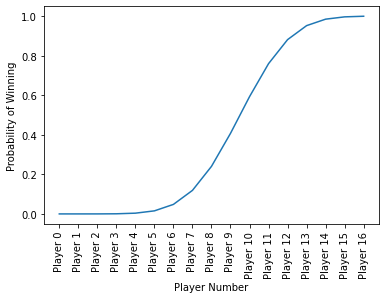

In [11]:
import matplotlib.pyplot as plt

plt.plot(df.iloc[:,-2])
plt.xticks(rotation=90)
plt.xlabel("Player Number")
plt.ylabel("Probability of Winning")